1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
from scipy import linalg as la

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
N = 2000
X = np.zeros((N,3))
X[:,0] = npr.normal(0,1, N)
X[:,1] = X[:,0] + npr.normal(0,3,N)
X[:,2] = 2*X[:,0] + X[:,1]

np.set_printoptions(suppress=True)

Cov = np.cov(X.T)
print("Covariance Matrix", '\n', Cov,'\n')
l, V = la.eig(Cov)
print("Eigenvalues with eig",'\n',np.real_if_close(l),'\n')
print("Eigenvectors with eig \n", V,'\n')

U, spectrum, Vt = la.svd(Cov)
print("shapes:", U.shape,  spectrum.shape, Vt.shape, '\n')

print ("Spectrum", '\n',np.real_if_close(spectrum),'\n')
print ("U \n", U,'\n')
print ("Vt \n", Vt,'\n')

# Let's verify the definition of SVD by hand
D = np.zeros((3,3))
for i in range(3):
    D[i, i] = spectrum[i]
SVD = np.dot(U, np.dot(D, Vt))
print ("Covariance matrix reconstructed from SVD by definition \n", SVD, '\n')
np.allclose(SVD, Cov)

X0 = [X[:,i] - np.mean(X[:,i]) for i in range (0,3)]
U0, spectrum0, Vt0 = np.linalg.svd(X0)

l_svd = spectrum0**2/(N-1)
V_svd = U0
print("Eigenvalues with svd",'\n',l_svd, '\n')
print("Eigenvectors with svd \n", V_svd, '\n')

Covariance Matrix 
 [[ 1.02810902  1.10427774  3.16049577]
 [ 1.10427774 10.00148962 12.2100451 ]
 [ 3.16049577 12.2100451  18.53103664]] 

Eigenvalues with eig 
 [27.58963595  0.          1.97099933] 

Eigenvectors with eig 
 [[-0.12035742 -0.81649658  0.56466576]
 [-0.57121408 -0.40824829 -0.7120729 ]
 [-0.81192892  0.40824829  0.41725863]] 

shapes: (3, 3) (3,) (3, 3) 

Spectrum 
 [27.58963595  1.97099933  0.        ] 

U 
 [[-0.12035742  0.56466576 -0.81649658]
 [-0.57121408 -0.7120729  -0.40824829]
 [-0.81192892  0.41725863  0.40824829]] 

Vt 
 [[-0.12035742 -0.57121408 -0.81192892]
 [ 0.56466576 -0.7120729   0.41725863]
 [-0.81649658 -0.40824829  0.40824829]] 

Covariance matrix reconstructed from SVD by definition 
 [[ 1.02810902  1.10427774  3.16049577]
 [ 1.10427774 10.00148962 12.2100451 ]
 [ 3.16049577 12.2100451  18.53103664]] 

Eigenvalues with svd 
 [27.58963595  1.97099933  0.        ] 

Eigenvectors with svd 
 [[-0.12035742  0.56466576 -0.81649658]
 [-0.57121408 -0.7120

In [8]:
Lambda=np.diag(l)
print (np.real_if_close(Lambda))
print ("A.trace():", Cov.trace())
print ("Lambda.trace():", np.real_if_close(Lambda.trace()))

print ("1st eigenvalue weight:   ", np.real_if_close(Lambda[0,0])/np.real_if_close(Lambda.trace()))
print ("2nd eigenvalue weight:   ", np.real_if_close(Lambda[1,1])/np.real_if_close(Lambda.trace()))
print ("3rd eigenvalue weight:   ", np.real_if_close(Lambda[2,2])/np.real_if_close(Lambda.trace()))

[[27.58963595  0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          1.97099933]]
A.trace(): 29.560635276288856
Lambda.trace(): 29.560635276288828
1st eigenvalue weight:    0.9333235124370636
2nd eigenvalue weight:    4.563272023860767e-17
3rd eigenvalue weight:    0.06667648756293638


In [28]:
# 1st and 3rd column of V correspond to the most important eigenvenctors
V0 = V.copy()
V0[:,1] = 0
print(V0)
l0 = np.real_if_close(l)
print(l0)

# Rotate data by eigenvectors
Xp = np.dot(V0.T, X.T).T

[[-0.12035742  0.          0.56466576]
 [-0.57121408  0.         -0.7120729 ]
 [-0.81192892  0.          0.41725863]]
[27.58963595  0.          1.97099933]
(2000, 3)


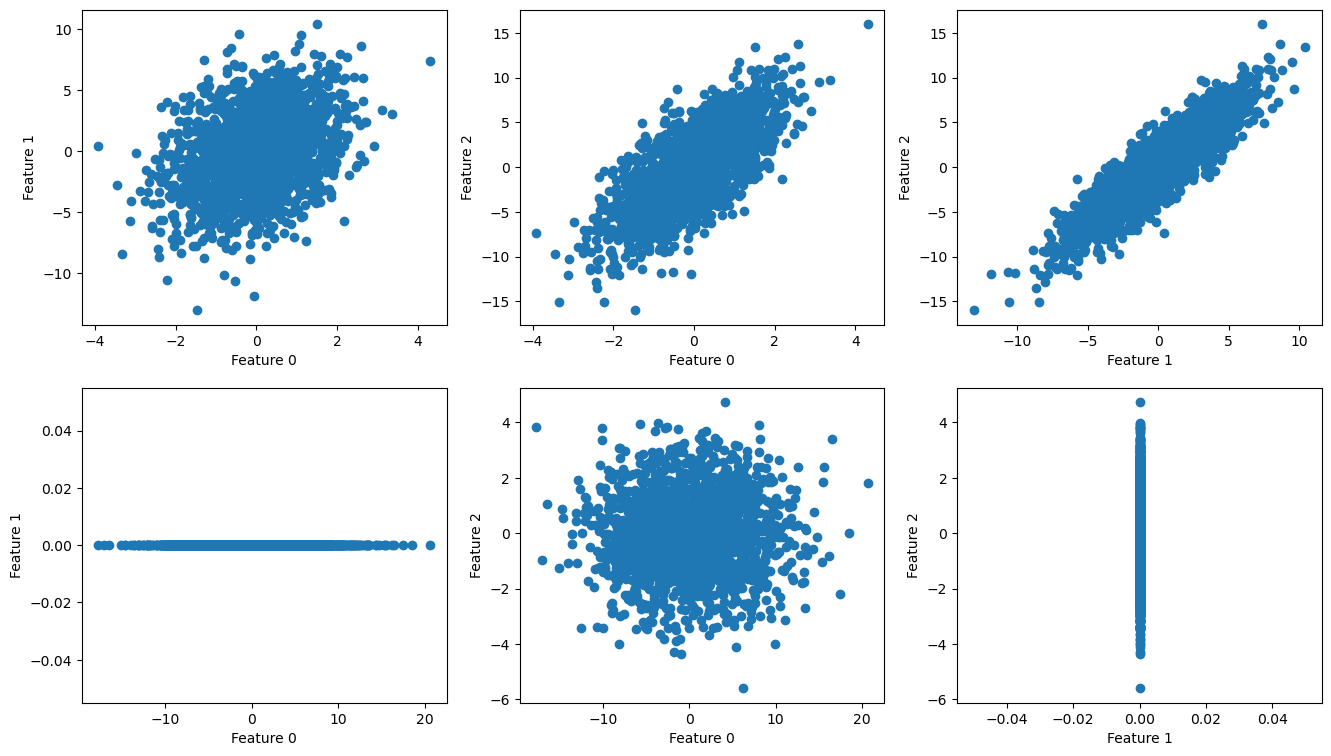

In [31]:
# Plotting before and after PCA
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6) ) = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))

ax1.scatter(X[:,0],X[:,1])
ax1.set_xlabel("Feature 0")
ax1.set_ylabel("Feature 1")

ax2.scatter(X[:,0],X[:,2])
ax2.set_xlabel("Feature 0")
ax2.set_ylabel("Feature 2")

ax3.scatter(X[:,1],X[:,2])
ax3.set_xlabel("Feature 1")
ax3.set_ylabel("Feature 2")

ax4.scatter(Xp[:,0],Xp[:,1])
ax4.set_xlabel("Feature 0")
ax4.set_ylabel("Feature 1")

ax5.scatter(Xp[:,0],Xp[:,2])
ax5.set_xlabel("Feature 0")
ax5.set_ylabel("Feature 2")

ax6.scatter(Xp[:,1],Xp[:,2])
ax6.set_xlabel("Feature 1")
ax6.set_ylabel("Feature 2")

plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [39]:
noise = np.zeros((N,10))
sigmas = npr.uniform(0,1.0/50, 10)
print("Standard deviations for noise: ", sigmas, "\n")
for i in range (0,10):
    noise[:,i] = npr.normal(0, sigmas[i], N)
NoisyX = np.hstack((X, noise))
print(NoisyX.shape)

Standard deviations for noise:  [0.01796017 0.00224468 0.00523028 0.00425873 0.00645644 0.00336499
 0.01502029 0.01848649 0.01904917 0.01569799] 

(2000, 13)


In [42]:
Cov2 = np.cov(NoisyX.T)
print("Covariance Matrix", '\n', Cov2,'\n')
l2, V2 = la.eig(Cov2)
print("Eigenvalues with eig",'\n',np.real_if_close(l2),'\n')
print("Eigenvectors with eig \n", V2,'\n')

Covariance Matrix 
 [[ 1.02810902  1.10427774  3.16049577 -0.00007314  0.00002599 -0.00004459
  -0.00005959  0.00021607  0.00004066 -0.00007983  0.00035142 -0.00086795
  -0.00008971]
 [ 1.10427774 10.00148962 12.2100451  -0.00032706  0.00021659 -0.00031447
  -0.00017542 -0.00014084 -0.0001107   0.00105175 -0.00349141  0.00001874
  -0.00007733]
 [ 3.16049577 12.2100451  18.53103664 -0.00047335  0.00026857 -0.00040366
  -0.0002946   0.00029131 -0.00002937  0.00089208 -0.00278856 -0.00171715
  -0.00025675]
 [-0.00007314 -0.00032706 -0.00047335  0.00032161  0.00000026  0.00000101
   0.00000099 -0.00000291  0.00000041 -0.00000385  0.0000029  -0.00000174
   0.00000058]
 [ 0.00002599  0.00021659  0.00026857  0.00000026  0.00000491  0.00000033
   0.00000027  0.00000024 -0.00000007 -0.00000063  0.00000061  0.00000005
   0.00000055]
 [-0.00004459 -0.00031447 -0.00040366  0.00000101  0.00000033  0.0000266
   0.00000029 -0.00000004  0.00000048 -0.00000118 -0.00000079 -0.00000358
  -0.0000009 ]
 [-

In [47]:
Lambda2=np.diag(l2)
print (np.real_if_close(Lambda2[Lambda2>0]))
print ("A.trace():", Cov2.trace())
print ("Lambda.trace():", np.real_if_close(Lambda2.trace()))

for i in range (0, Lambda2.shape[0]):
    print(f"Relative weight of the {i}-th eigenvalue: {np.real_if_close(Lambda2[i][i])/np.real_if_close(Lambda2.trace())}")

[27.58963677  1.97100142  0.00037449  0.00035023  0.00032152  0.0002443
  0.00020409  0.          0.00004001  0.00000489  0.00002657  0.00001174
  0.00001842]
A.trace(): 29.562234451071156
Lambda.trace(): 29.562234451071134
Relative weight of the 0-th eigenvalue: 0.9332730519145117
Relative weight of the 1-th eigenvalue: 0.0666729513916855
Relative weight of the 2-th eigenvalue: 1.2668020449957648e-05
Relative weight of the 3-th eigenvalue: 1.1847102342184905e-05
Relative weight of the 4-th eigenvalue: 1.0875933558046308e-05
Relative weight of the 5-th eigenvalue: 8.264002308973771e-06
Relative weight of the 6-th eigenvalue: 6.903784985554591e-06
Relative weight of the 7-th eigenvalue: 1.9495207782494877e-17
Relative weight of the 8-th eigenvalue: 1.3535166225450877e-06
Relative weight of the 9-th eigenvalue: 1.6542504946998923e-07
Relative weight of the 10-th eigenvalue: 8.986680630511849e-07
Relative weight of the 11-th eigenvalue: 3.972559859848335e-07
Relative weight of the 12-th e

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

--2025-01-01 16:27:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/mattia/data/magic04.data’

magic04.data            [      <=>           ]   1.41M  1.26MB/s    in 1.1s    

2025-01-01 16:27:31 (1.26 MB/s) - ‘/home/mattia/data/magic04.data’ saved [1477391]

--2025-01-01 16:27:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/mattia/data/magic04.names’

magic04.names           [ <=>                ]   5.27K  --.-KB/s    in 0.002s  

2025